In [1]:
import os 
os.chdir('../..')

In [2]:
import comet_ml
import torch as th
import io
import matplotlib.pyplot as plt
import sklearn

from FLF.model.TorchResNetFactory import TorchResNetFactory
from FLF.TorchFederatedLearnerCIFAR100 import TorchFederatedLearnerCIFAR100, TorchFederatedLearnerCIFAR100Config, TorchFederatedLearnerTechnicalConfig

from mutil.Empty import Empty

In [3]:
comet_api = comet_ml.api.API("cgss7piePhyFPXRw1J2uUEjkQ")

In [4]:
exp = comet_api.get("federated-learning/server-yogi-l2/331206750ff745959fb927ef5de626f7")

In [5]:
p = exp.get_parameters_summary()

In [6]:
for d in p:
    if d['name'] == "NORM":
        norm = d["valueCurrent"]

In [7]:
model = TorchResNetFactory(norm=norm)()

In [8]:
model_list = exp.get_asset_list('model-element')

In [9]:
model_weights = exp.get_asset(model_list[0]['assetId'])

In [10]:
model.load_state_dict(th.load(io.BytesIO(model_weights)))

<All keys matched successfully>

In [11]:
fl = TorchFederatedLearnerCIFAR100(Empty(), TorchFederatedLearnerCIFAR100Config(N_CLIENTS=1, IS_IID_DATA=False), TorchFederatedLearnerTechnicalConfig())

In [12]:
fl.model = model

In [13]:
def process_cm(cm, name):
    cm = np.array(cm)
    cm.sum(axis=0) / cm.sum()
    plt.rcParams["figure.figsize"] = (10, 5)
    plt.bar(range(100), cm.sum(axis=0) / cm.sum())
    plt.title(f"Predicted label distribution ({name})")
    plt.show()
    acc = np.trace(cm) / cm.sum()
    print(f"{name} accuracy: {acc}")
    plt.rcParams["figure.figsize"] = (10, 10)
    plt.imshow(cm)
    plt.show()

In [14]:
train_metrics = fl.test(fl.train_loader_list[0])

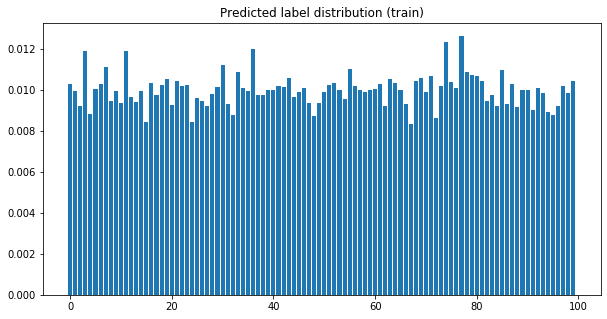

train accuracy: 0.93572


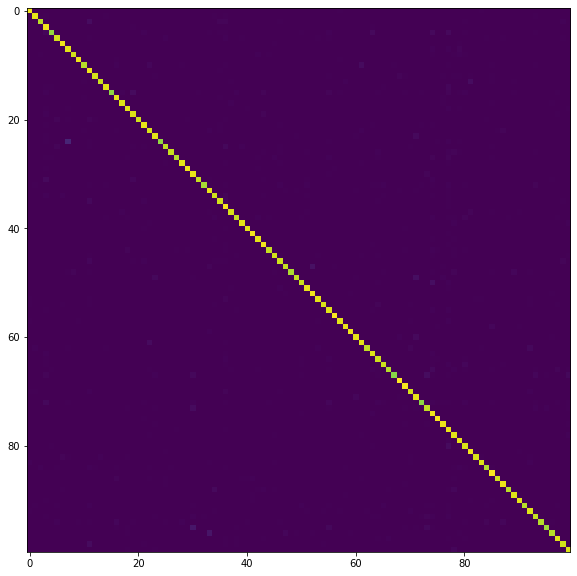

In [16]:
process_cm(train_metrics['confusion_matrix'], 'train')

In [17]:
test_metrics = fl.test(fl.test_loader)

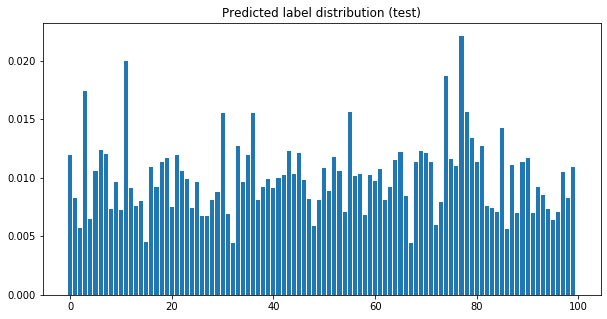

test accuracy: 0.3884


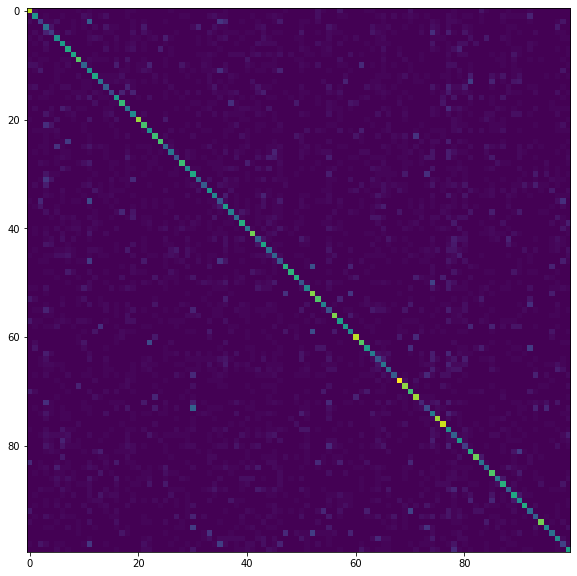

In [18]:
process_cm(test_metrics['confusion_matrix'], 'test')

In [20]:
np.array(train_metrics['confusion_matrix']).sum(axis=1)

array([500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500,
       500, 500, 500, 500, 500, 500, 500, 500, 500])